# 안녕하세요^^ 
## AIVLE 미니프로젝트 '서울시 생활정보 기반 대중교통 수요 분석 ' 과정에 오신 여러분을 환영합니다.
* 본 과정에서는 실제 사례와 데이터를 기반으로 문제를 해결하는 전체 과정을 자기 주도형 실습으로 진행해볼 예정입니다.
* 앞선 교육과정을 정리하는 마음과 지금까지 배운 내용을 바탕으로 문제 해결을 해볼게요!
* 미니 프로젝트를 통한 문제 해결 과정 'A에서 Z까지', 지금부터 시작합니다!

## 개인과제
* 데이터 구조, 분포 확인, 전처리 : 1.1_버스정류장데이터 / 1.2 유동인구데이터 / 1.3_주민등록데이터 / 1.4_업종등록데이터
* 데이터간 관계 가설 수립 및 검증 : 1.5_데이터 분석

---

# 데이터 분석부터 먼저 시작해보겠습니다.
## "구 별 유동인구 데이터" 를 확인해 보도록 하겠습니다

In [1]:
# 필요 라이브러리부터 설치합니다.
%pip install pandas seaborn

Note: you may need to restart the kernel to use updated packages.


## 기본전제

[기본 데이터]
* 1.2 seoul_moving_month_4.csv

[데이터 소개]
* 서울 시 구별 이동 2022년 4월 데이터

[변수 소개]
* 도착시간 : 0 -> "0:00~0:59"를 의미 
* 출발 자치구 : 자치구 코드
* 성별 : F(여성), M(남성)
* 나이 : 10 ~ 79세 (5세 단위), 0 ~ 10세, 80세 이상으로 구분
* 유형 : H(야간상주지), W(주간상주지), E(기타)
* 평균 이동 시간 : 동일 열 내 이동인구의 월 단위 평균 이동 시간 (10분단위)
* 이동인구 : 추정 합산값으로 소수점 표출, 개인정보 비식별화를 위해 3명 미만의 경우 * 처리

---

# 1.데이터 불러오기
## 모든 미니 프로젝트의 시작은 '데이터 불러오기' 부터라고 할 수 있습니다.
+ KeyPoint : 불러오고자 하는 데이터에 따라 자유롭게 변수로 지정할 수 있다.

###  데이터 프레임을 불러오고 변수로 저장(여기서는 CSV 기준으로 진행)
* csv : pd.read_csv("파일이름. csv")
* txt : pd.read_csv("파일이름. csv", sep="구분자")
* xlsx : pd.read_excel('파일이름.xlsx')
* pickle : pd.read_pickle("파일이름.pkl") <br>
 [참고] pickle은 파이썬의 모든 객체를 파일로 저장할 수 있는 방법으로 DataFrame,List,Dict 등 모든 객체 저장 가능(특히 sklearn라이브러리를 통해 모델을 학습시키고, 저장할 때 많이 사용)

#### [실습문제1] 데이터 로딩
* Pandas 라이브러리를 활용해서 'seoul_moving_month_4_step1.csv' 데이터를 확인하세요.
    * 아래에 'Pandas'를 Import하고 '1.2 seoul_moving_month_4.csv'파일을 'seoul_moving'에 불러오고,  Shape을 확인하는 소스코드를 작성하고 실행해보세요.
    * 데이터 파일 로딩시 참고 사항 
        * 구분자(sep)는 ',' 입니다
        * UTF-8 인코더를 사용해 주세요
        * index column은 0번 열 입니다

In [1]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
import pandas as pd
seoul_moving=pd.read_csv("1.2 seoul_moving_month_4.csv",encoding="UTF-8",sep=",",index_col=0)
seoul_moving.head()

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
0,202204,일,0,11010,11010,F,0,EE,10,28.02
1,202204,일,0,11010,11010,F,0,EH,10,27.52
2,202204,일,0,11010,11010,F,0,HE,10,27.83
3,202204,일,0,11010,11010,F,10,HW,10,6.05
4,202204,일,0,11010,11010,F,10,EH,90,5.95


In [2]:
# 데이터 프레임의 Shape을 확인합니다.
seoul_moving.shape

(28923054, 10)

---

# 2.기본 정보 확인 및 클렌징

+ 데이터 클렌징 : 결측치, 이상치 등을 제거하여 데이터 분석 결과가 왜곡 되는 문제를 방지하기 위한 정제 과정

#### [실습문제2] 기본 정보 확인하기
* 'seoul_moving' 데이터의 정보를 확인해보세요.
* 'describe', 'info', 'head' 등 전부 활용해 보겠습니다.

In [3]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_moving.describe()

,대상연월,도착시간,출발 시군구 코드,도착 시군구 코드,나이,평균 이동 시간(분)
count,28923054.0,2.892305e+07,2.892305e+07,2.892305e+07,2.892305e+07,2.892305e+07
mean,202204.0,1.365597e+01,1.712362e+04,1.719750e+04,4.279614e+01,3.279829e+01
std,0.0,5.849675e+00,9.046478e+03,9.063818e+03,1.777485e+01,2.584213e+01
min,202204.0,0.000000e+00,1.101000e+04,1.101000e+04,0.000000e+00,1.000000e+01
25%,202204.0,1.000000e+01,1.110000e+04,1.111000e+04,3.000000e+01,2.000000e+01
50%,202204.0,1.400000e+01,1.120000e+04,1.120000e+04,4.500000e+01,3.000000e+01
75%,202204.0,1.800000e+01,3.101400e+04,3.102100e+04,5.500000e+01,4.000000e+01
max,202204.0,2.300000e+01,3.900000e+04,3.900000e+04,8.000000e+01,7.700000e+02


In [4]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_moving.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28923054 entries, 0 to 968462
Data columns (total 10 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   대상연월         int64 
 1   요일           object
 2   도착시간         int64 
 3   출발 시군구 코드    int64 
 4   도착 시군구 코드    int64 
 5   성별           object
 6   나이           int64 
 7   이동유형         object
 8   평균 이동 시간(분)  int64 
 9   이동인구(합)      object
dtypes: int64(6), object(4)
memory usage: 2.4+ GB


In [5]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_moving.head()

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
0,202204,일,0,11010,11010,F,0,EE,10,28.02
1,202204,일,0,11010,11010,F,0,EH,10,27.52
2,202204,일,0,11010,11010,F,0,HE,10,27.83
3,202204,일,0,11010,11010,F,10,HW,10,6.05
4,202204,일,0,11010,11010,F,10,EH,90,5.95


* 1번 열의 의미
    * " 2022년 1월 일요일에 11010(종로구)에서 11010(종로구)으로 이동하여 0시 ~ 0시 59분 사이에 도착했고, E(기타)에서 H(야간상주지(집))으로 이동한 0 ~ 10세 여성은 총 27.52명이며 이들의 평균 이동시간은 10분이다

#### [실습문제3] 결측치 처리 ( NaN이 아닌 결측치를 처리 해봅시다)

* '인구이동(합)' column은 이동 인구의 합산인데 object 타입입니다. 

    - 왜 일까요? 

    - Tip! (이동인구 : 추정 합산값으로 소수점 표출, 개인정보 비식별화를 위해 3명 미만의 경우 * 처리)

    - 해당 값을 나름의 기준으로 변경하세요

    - '인구이동(합)' 컬럼의 데이터 타입을 수치형으로 변경하세요 

In [6]:
# 아래에 실습코드를 작성하고 결과를 확인합니다. (Hint : value_counts())
seoul_moving["이동인구(합)"].value_counts()

*          3842041
3.3         399374
6.05        366830
3.29        289731
3.31        232069
            ...   
2352.37          1
1617.99          1
3141.86          1
1485.54          1
979.87           1
Name: 이동인구(합), Length: 135812, dtype: int64

In [7]:
# 최빈값과 평균값을 알 수 없는 상황이라 중위값으로 대체
# a=seoul_moving.loc[seoul_moving["이동인구(합)"]!="*"]
# b=a["이동인구(합)"].median()
# b

In [2]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_moving.loc[seoul_moving["이동인구(합)"]=="*","이동인구(합)"]=1.5
seoul_moving["이동인구(합)"].value_counts()

1.5        3842041
3.3         399374
6.05        366830
3.29        289731
3.31        232069
            ...   
2352.37          1
1617.99          1
3141.86          1
1485.54          1
979.87           1
Name: 이동인구(합), Length: 135812, dtype: int64

In [3]:
# 이동인구(합) column의 데이터 타입을 바꿔주세요
# astype
seoul_moving=seoul_moving.astype({"이동인구(합)":"float"})
seoul_moving.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28923054 entries, 0 to 968462
Data columns (total 10 columns):
 #   Column       Dtype  
---  ------       -----  
 0   대상연월         int64  
 1   요일           object 
 2   도착시간         int64  
 3   출발 시군구 코드    int64  
 4   도착 시군구 코드    int64  
 5   성별           object 
 6   나이           int64  
 7   이동유형         object 
 8   평균 이동 시간(분)  int64  
 9   이동인구(합)      float64
dtypes: float64(1), int64(6), object(3)
memory usage: 2.4+ GB


#### [실습문제4] 이동유형, 요일, 성별 변수의 value수를 파악

* 역시나 value_counts()를 활용해 봅시다.

In [10]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_moving["이동유형"].value_counts()

EH    5757073
HE    5520005
EE    5085099
WH    3108026
WE    2809148
HW    2695189
EW    2304535
WW    1026134
HH     617845
Name: 이동유형, dtype: int64

In [11]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_moving["요일"].value_counts()

토    4690806
금    4641881
목    4011291
수    3955646
화    3926876
월    3906272
일    3790282
Name: 요일, dtype: int64

In [12]:
seoul_moving["성별"].value_counts()
# 28923054

M    16355029
F    12568025
Name: 성별, dtype: int64

* 4월의 요일 수를 알려드릴게요
    * 일 : 4, 월 : 4, 화 : 4, 수 : 4, 목 : 4, 금 : 5, 토 : 5

In [13]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.


#### [실습문제5] 어느 요일의 심야 이동이 가장 많을까요?

In [4]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# 0:00~ 4:59
c=seoul_moving.loc[seoul_moving['도착시간']<5]
c["요일"].value_counts()

토    423995
금    359012
일    331392
목    308651
수    303357
화    292786
월    273062
Name: 요일, dtype: int64

#### [실습문제6] 서울 지역의 데이터만 골라 보도록 하겠습니다.

* 우리는 서울시의 데이터만 필요합니다!

* 출발과 도착이 모두 서울인 데이터만 추출해 주세요.

In [5]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_moving=seoul_moving.loc[((11000<seoul_moving["도착 시군구 코드"]) &  (seoul_moving["도착 시군구 코드"]<20000)) & ((11000<seoul_moving["출발 시군구 코드"]) & (seoul_moving["출발 시군구 코드"]<20000))]
seoul_moving

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
0,202204,일,0,11010,11010,F,0,EE,10,28.02
1,202204,일,0,11010,11010,F,0,EH,10,27.52
2,202204,일,0,11010,11010,F,0,HE,10,27.83
3,202204,일,0,11010,11010,F,10,HW,10,6.05
4,202204,일,0,11010,11010,F,10,EH,90,5.95
...,...,...,...,...,...,...,...,...,...,...
920410,202204,토,23,11250,11250,M,80,WH,10,85.10
920411,202204,토,23,11250,11250,M,80,EH,10,28.36
920412,202204,토,23,11250,11250,M,80,EE,20,37.99
920413,202204,토,23,11250,11250,M,80,HE,10,9.42


In [16]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

#### [실습문제7] 서울지역의 구 별로 groupby하여 데이터를 확인하겠습니다 (유동인구 기준)

* 유출이 제일 많은 구는?

* 유입이 제일 많은 구는?

* 유출이 제일 적은 구는?

* 유입이 제일 적은 구는?

* 참고자료 서울 구별 코드
    * 11010	종로구
    * 11020	중구
    * 11030	용산구
    * 11040	성동구
    * 11050	광진구
    * 11060	동대문구
    * 11070	중랑구
    * 11080	성북구
    * 11090	강북구
    * 11100	도봉구
    * 11110	노원구
    * 11120	은평구
    * 11130	서대문구
    * 11140	마포구
    * 11150	양천구
    * 11160	강서구
    * 11170	구로구
    * 11180	금천구
    * 11190	영등포구
    * 11200	동작구
    * 11210	관악구
    * 11220	서초구
    * 11230	강남구
    * 11240	송파구
    * 11250	강동구

In [17]:
# 아래에 실습코드를 작성하고 결과를 확인합니다. (출발 시군구 코드)
seoul_moving.groupby("출발 시군구 코드",as_index=False)[["이동인구(합)"]].sum().sort_values(by='이동인구(합)',ascending=False)

,출발 시군구 코드,이동인구(합)
22,11230,46220924.63
23,11240,36207933.02
21,11220,29698071.20
18,11190,25835980.43
13,11140,24517465.86
15,11160,22526485.94
24,11250,22035184.61
10,11110,21392595.19
1,11020,20296645.78
0,11010,19862431.70


In [18]:
# 아래에 실습코드를 작성하고 결과를 확인합니다. (도착 시군구 코드)
seoul_moving.groupby("도착 시군구 코드",as_index=False)[["이동인구(합)"]].sum().sort_values(by='이동인구(합)',ascending=False)

,도착 시군구 코드,이동인구(합)
22,11230,46152613.40
23,11240,36156898.50
21,11220,29763430.80
18,11190,25824111.41
13,11140,24539297.75
15,11160,22770901.22
24,11250,21996357.39
10,11110,21371821.86
1,11020,20275545.43
0,11010,19809988.63


#### [실습문제8] 낮시간만 볼게요 심야버스 제외하겠습니다

* 도착시간 0부터 4까지(0:00 ~ 4:59) 제거

In [19]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_moving.loc[seoul_moving["도착시간"]>=5].groupby("출발 시군구 코드",as_index=False)[["이동인구(합)"]].sum().sort_values(by='이동인구(합)',ascending=False)

,출발 시군구 코드,이동인구(합)
22,11230,44159623.53
23,11240,34905878.00
21,11220,28672394.50
18,11190,24916496.12
13,11140,23344976.13
15,11160,21727043.19
24,11250,21279515.86
10,11110,20750005.33
1,11020,19473976.40
0,11010,19205844.32


In [20]:
seoul_moving.loc[seoul_moving["도착시간"]>=5].groupby("도착 시군구 코드",as_index=False)[["이동인구(합)"]].sum().sort_values(by='이동인구(합)',ascending=False)

,도착 시군구 코드,이동인구(합)
22,11230,44684651.43
23,11240,34837613.05
21,11220,28911318.58
18,11190,25006858.60
13,11140,23639807.30
15,11160,21839762.06
24,11250,21101460.33
10,11110,20611941.03
1,11020,19715322.61
0,11010,19385709.60


#### [실습문제9] '도착 시군구 코드' 를 기준으로 각 구별로 '평균 이동 시간(분)' , '이동인구(합)' 의 평균 과 합을 구해보겠습니다

* groupby 사용, as_index=False로 설정해주세요

In [21]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
a=seoul_moving.groupby("도착 시군구 코드",as_index=False)[["이동인구(합)"]].sum().rename(columns={"이동인구(합)":"총 이동인구"})
b=seoul_moving.groupby("도착 시군구 코드",as_index=False)[["이동인구(합)"]].mean()
c=seoul_moving.groupby("도착 시군구 코드",as_index=False)[["평균 이동 시간(분)"]].sum().rename(columns={"평균 이동 시간(분)":"총 이동시간"})
d=seoul_moving.groupby("도착 시군구 코드",as_index=False)[["평균 이동 시간(분)"]].mean()

In [7]:
l=seoul_moving.groupby("출발 시군구 코드",as_index=False)[["이동인구(합)"]].sum().rename(columns={"이동인구(합)":"총 이동인구_출발"})
k=seoul_moving.groupby("출발 시군구 코드",as_index=False)[["이동인구(합)"]].mean().rename(columns={"이동인구(합)":"이동인구(합)_출발"})
j=seoul_moving.groupby("출발 시군구 코드",as_index=False)[["평균 이동 시간(분)"]].sum().rename(columns={"평균 이동 시간(분)":"총 이동시간_출발"})
h=seoul_moving.groupby("출발 시군구 코드",as_index=False)[["평균 이동 시간(분)"]].mean().rename(columns={"평균 이동 시간(분)":"평균 이동 시간(분)_출발"})

In [22]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# seoul_moving.groupby(by=['도착 시군구 코드'], as_index = False)[['평균 이동 시간(분)','이동인구(합)']].sum()


,도착 시군구 코드,평균 이동 시간(분),이동인구(합)
0,11010,10239340,19809988.63
1,11020,10285410,20275545.43
2,11030,9488120,15247193.24
3,11040,9952210,18076235.50
4,11050,9761770,18715186.44
5,11060,9998260,16987577.97
6,11070,9102380,14518503.71
7,11080,10314120,19524264.96
8,11090,8765160,13079023.71
9,11100,8053130,11243990.02


In [23]:
# 컬럼명을 변경해볼까요?
a

,도착 시군구 코드,총 이동인구
0,11010,19809988.63
1,11020,20275545.43
2,11030,15247193.24
3,11040,18076235.50
4,11050,18715186.44
5,11060,16987577.97
6,11070,14518503.71
7,11080,19524264.96
8,11090,13079023.71
9,11100,11243990.02


In [24]:
# 파일을 합쳐볼까요
df_seoul_moving=pd.merge(c,a,on="도착 시군구 코드")
df_seoul_moving=pd.merge(df_seoul_moving,d,on="도착 시군구 코드")
df_seoul_moving=pd.merge(df_seoul_moving,b,on="도착 시군구 코드")
df_seoul_moving

,도착 시군구 코드,총 이동시간,총 이동인구,평균 이동 시간(분),이동인구(합)
0,11010,10239340,19809988.63,21.443330,41.486279
1,11020,10285410,20275545.43,21.166269,41.724896
2,11030,9488120,15247193.24,21.553622,34.636181
3,11040,9952210,18076235.50,21.950757,39.869241
4,11050,9761770,18715186.44,22.779081,43.671869
5,11060,9998260,16987577.97,21.985940,37.355286
6,11070,9102380,14518503.71,23.849072,38.039814
7,11080,10314120,19524264.96,22.508757,42.608281
8,11090,8765160,13079023.71,24.282441,36.233295
9,11100,8053130,11243990.02,25.102882,35.049298


In [8]:
df_seoul_moving1=pd.merge(j,l,on="출발 시군구 코드")
df_seoul_moving1=pd.merge(df_seoul_moving1,h,on="출발 시군구 코드")
df_seoul_moving1=pd.merge(df_seoul_moving1,k,on="출발 시군구 코드")
df_seoul_moving1

,출발 시군구 코드,총 이동시간_출발,총 이동인구_출발,평균 이동 시간(분)_출발,이동인구(합)_출발
0,11010,10995240,19862431.70,22.036271,39.807584
1,11020,11181870,20296645.78,21.893597,39.739917
2,11030,9917590,15148400.31,22.051094,33.681449
3,11040,10081210,18121271.09,22.043334,39.623540
4,11050,9670930,18675122.83,22.559683,43.564047
5,11060,9970040,16973103.47,21.939757,37.350479
6,11070,8753830,14509927.80,23.654589,39.208709
7,11080,10060910,19558088.65,22.249691,43.252692
8,11090,8289750,13084060.28,23.741981,37.472964
9,11100,7630960,11253816.27,24.649077,36.351414


In [10]:
# 해당 데이터프레임을 'df_seoul_moving.csv' 파일로 저장하세요
# df_seoul_moving.to_csv("df_seoul_moving.csv", index = False)
df_seoul_moving1.to_csv("df_seoul_moving1.csv", index = False)

---

# 3.데이터 분석하기
+ KeyPoint : 데이터의 형태를 살펴보고 다양한 분석기법을 통해 모델링에 적합하도록 정제요소를 선별할 수 있다.
  * 데이터들의 패턴 탐색
  * 변수들간의 관계 파악

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# 시각화 한글폰트 설정
# 맑은 고딕

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

# scipy
import scipy.stats as spst

#### [실습문제10] 데이터 분포 알아보기
* 다양한 변수를 기준으로 그래프를 그려보고 인사이트를 도출해보세요.

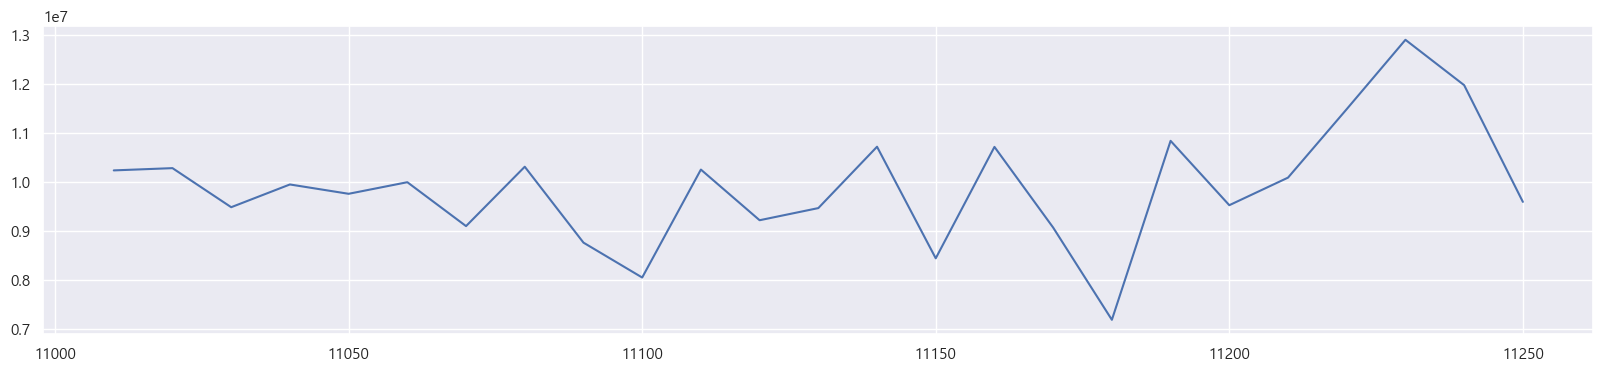

In [65]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
plt.figure(figsize=(20,4))
plt.plot("도착 시군구 코드",'총 이동시간',data=df_seoul_moving)
plt.show()

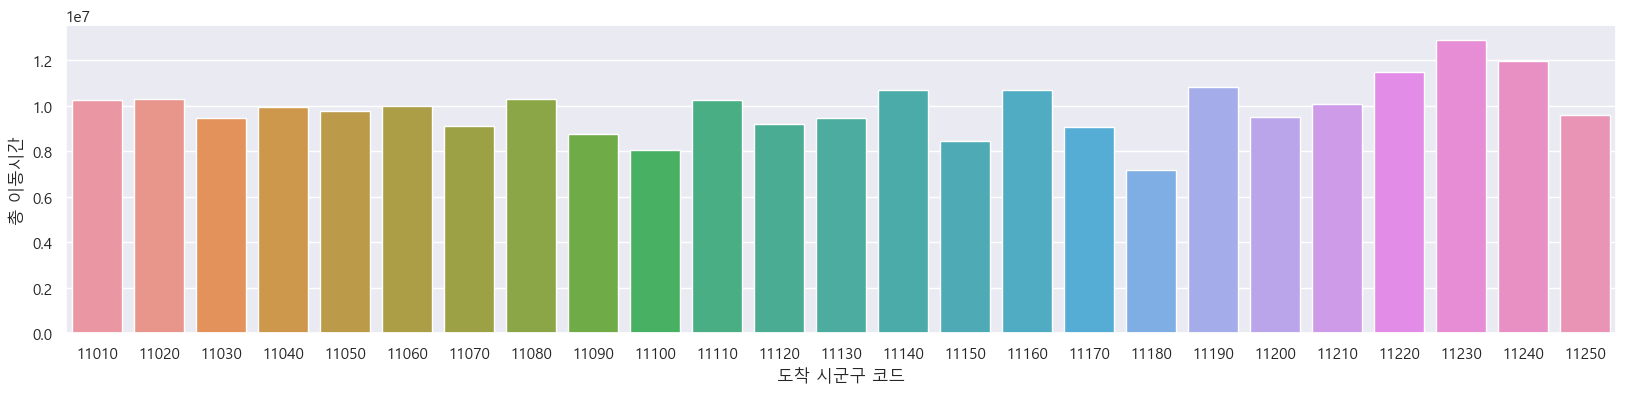

In [67]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
plt.figure(figsize=(20,4))
sns.barplot(x="도착 시군구 코드",y='총 이동시간',data=df_seoul_moving)
plt.show()

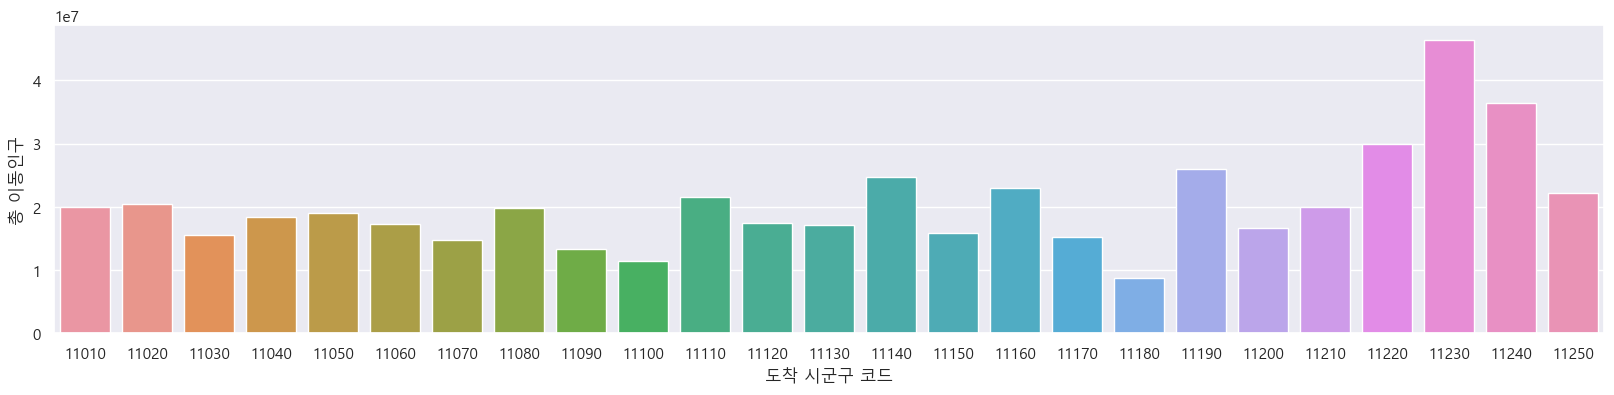

In [68]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
plt.figure(figsize=(20,4))
sns.barplot(x="도착 시군구 코드",y='총 이동인구',data=df_seoul_moving)
plt.show()

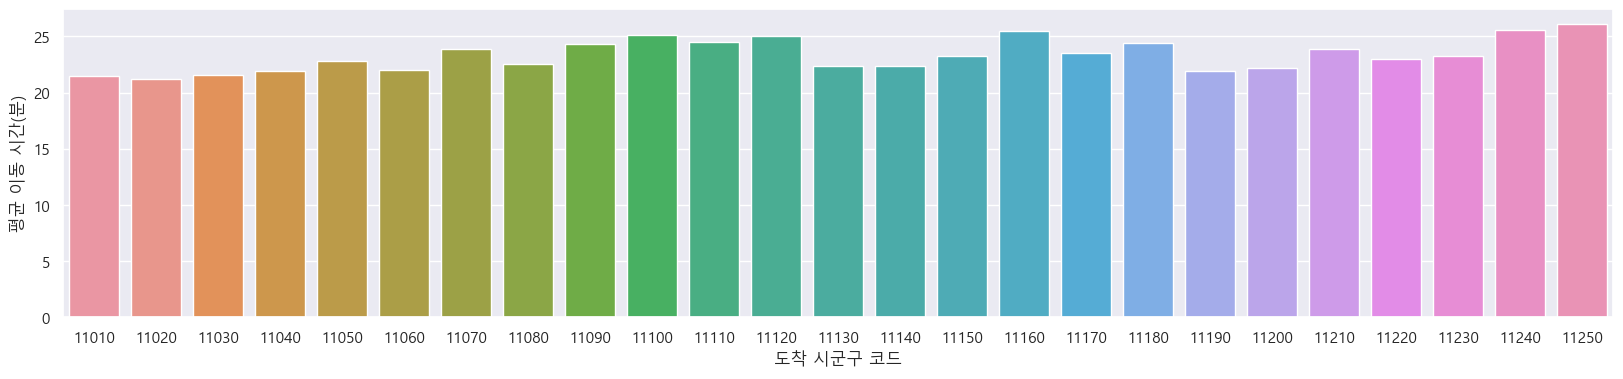

In [69]:
plt.figure(figsize=(20,4))
sns.barplot(x="도착 시군구 코드",y='평균 이동 시간(분)',data=df_seoul_moving)
plt.show()

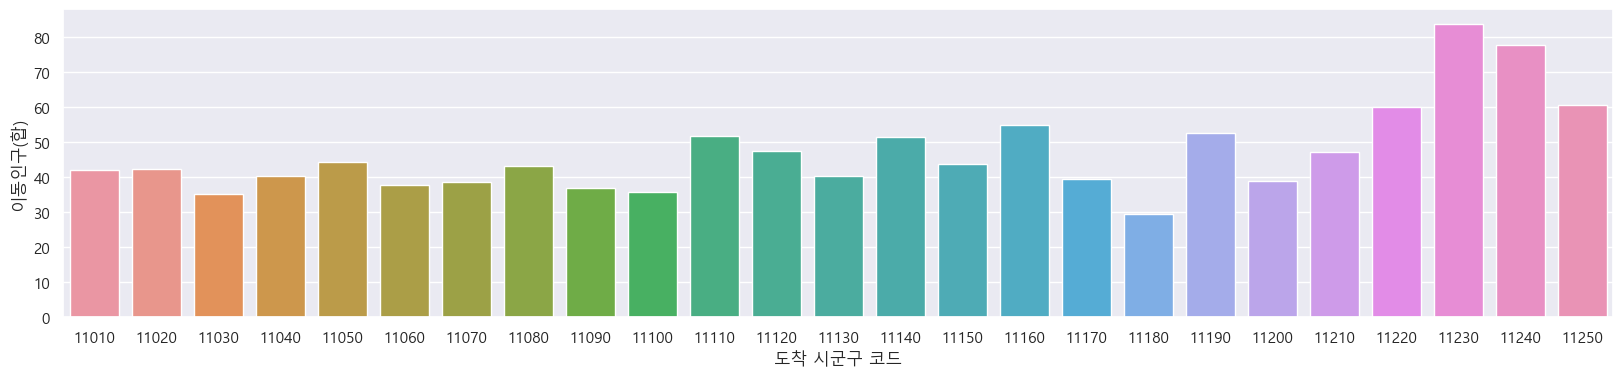

In [70]:
plt.figure(figsize=(20,4))
sns.barplot(x="도착 시군구 코드",y='이동인구(합)',data=df_seoul_moving)
plt.show()

In [ ]:
# 위 차트를 통해 알게된 사실을 정리해봅시다.
# 1. 
# 2.
# 3.

---